In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree





In [2]:
data1 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [3]:
data2 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [4]:
data3 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-9-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [5]:
data4= pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-20-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [6]:
data5 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-21-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [7]:
data6 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-34-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [8]:
data7 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-35-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [9]:
data8 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-42-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [10]:
data9 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-48-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [11]:
data10 = pd.read_csv(r"C:\Users\anshv\OneDrive\Desktop\Dh\CTU-IoT-Malware-Capture-60-1conn.log.labeled.csv",sep = "|", low_memory = False)

In [12]:
data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10],ignore_index = True)

In [13]:
data

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000358,1.569026e+09,CyeWQ7K6jWDDbI4Kd,192.168.1.195,123.0,89.221.210.188,123.0,udp,-,0.004499,96,...,-,0.0,Dd,2.0,152.0,2.0,152.0,-,Benign,-
25000359,1.568941e+09,CS9u9p3IiuKuTYfauc,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,-,84970.742165,8523,...,-,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,-,Malicious C&C,HeartBeat
25000360,1.569026e+09,ChLFLFZumxpFdFbV8,192.168.1.195,123.0,212.111.30.190,123.0,udp,-,0.007994,96,...,-,0.0,Dd,2.0,152.0,2.0,152.0,-,Benign,-
25000361,1.569026e+09,CdOxuh15kV4eHJYKkb,192.168.1.195,123.0,5.1.56.123,123.0,udp,-,0.005250,96,...,-,0.0,Dd,2.0,152.0,2.0,152.0,-,Benign,-


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 4.3+ GB


In [15]:
col= ['uid','service','orig_bytes','local_resp','tunnel_parents','missed_bytes','local_orig','duration','resp_bytes']
data.drop(columns=col, inplace = True)

In [16]:
data

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label
0,1.525880e+09,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,S,3.0,180.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,S,1.0,60.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,S,1.0,60.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,S,3.0,180.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,S,1.0,60.0,0.0,0.0,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000358,1.569026e+09,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,Dd,2.0,152.0,2.0,152.0,Benign,-
25000359,1.568941e+09,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,ShAdDaT,8952.0,483602.0,9613.0,520116.0,Malicious C&C,HeartBeat
25000360,1.569026e+09,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,Dd,2.0,152.0,2.0,152.0,Benign,-
25000361,1.569026e+09,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,Dd,2.0,152.0,2.0,152.0,Benign,-


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   id.orig_h       object 
 2   id.orig_p       float64
 3   id.resp_h       object 
 4   id.resp_p       float64
 5   proto           object 
 6   conn_state      object 
 7   history         object 
 8   orig_pkts       float64
 9   orig_ip_bytes   float64
 10  resp_pkts       float64
 11  resp_ip_bytes   float64
 12  label           object 
 13  detailed-label  object 
dtypes: float64(7), object(7)
memory usage: 2.6+ GB


In [18]:
missing_values = data.isnull().sum()

In [19]:
missing_values

ts                      0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
conn_state              0
history                 0
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
label                   0
detailed-label    9173939
dtype: int64

In [20]:
#percentage of missing values in each column
missing_values*100/len(data)

ts                 0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
conn_state         0.000000
history            0.000000
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
label              0.000000
detailed-label    36.695223
dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   id.orig_h       object 
 2   id.orig_p       float64
 3   id.resp_h       object 
 4   id.resp_p       float64
 5   proto           object 
 6   conn_state      object 
 7   history         object 
 8   orig_pkts       float64
 9   orig_ip_bytes   float64
 10  resp_pkts       float64
 11  resp_ip_bytes   float64
 12  label           object 
 13  detailed-label  object 
dtypes: float64(7), object(7)
memory usage: 2.6+ GB


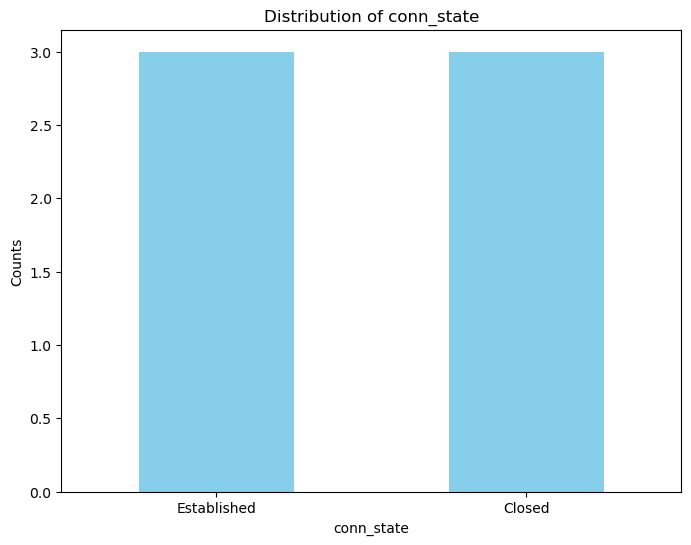

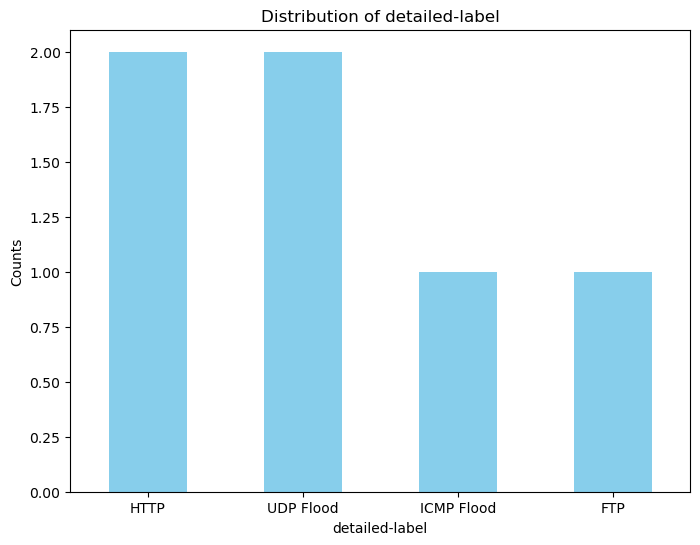

In [46]:


data = {

    'conn_state': ['Established', 'Closed', 'Established', 'Closed', 'Established', 'Closed'],
    'detailed-label': ['HTTP', 'UDP Flood', 'HTTP', 'ICMP Flood', 'FTP', 'UDP Flood']
}

df = pd.DataFrame(data)

# List of columns for which you want to create bar plots
columns_to_plot = [ 'conn_state',  'detailed-label']

# Create individual bar plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    category_counts = df[column].value_counts()
    category_counts.plot(kind='bar', color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=0)  # Remove x-axis label rotation
    plt.show()



<Figure size 1000x600 with 0 Axes>

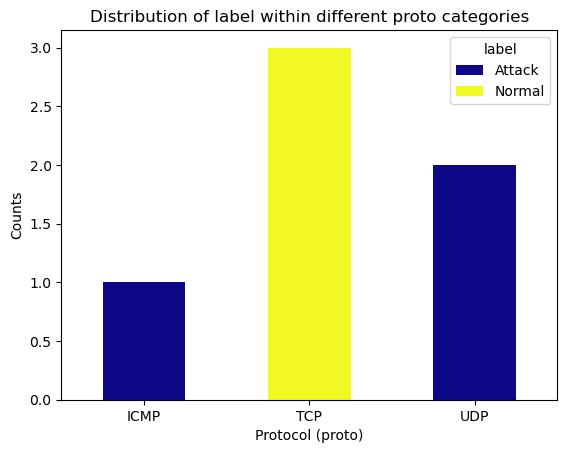

In [52]:



data = {
    'proto': ['TCP', 'UDP', 'TCP', 'ICMP', 'TCP', 'UDP'],
    'label': ['Normal', 'Attack', 'Normal', 'Attack', 'Normal', 'Attack'],
    
}

df = pd.DataFrame(data)


column_to_explore = 'label'

pivot_table = df.groupby(['proto', column_to_explore]).size().unstack()

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, colormap='plasma')
plt.xlabel('Protocol (proto)')
plt.ylabel('Counts')
plt.title(f'Distribution of {column_to_explore} within different proto categories')
plt.xticks(rotation=0)
plt.legend(title=column_to_explore)
plt.show()


In [22]:
column_name = 'proto'
value_counts = data[column_name].value_counts()
percentages = (value_counts / len(data[column_name])) * 100
result_df = pd.DataFrame({'Value': value_counts.index,'Count': value_counts.values, 'Percentage': percentages.values})
print(result_df)

  Value     Count  Percentage
0   tcp  24535142   98.139143
1   udp    440105    1.760394
2  icmp     25116    0.100463


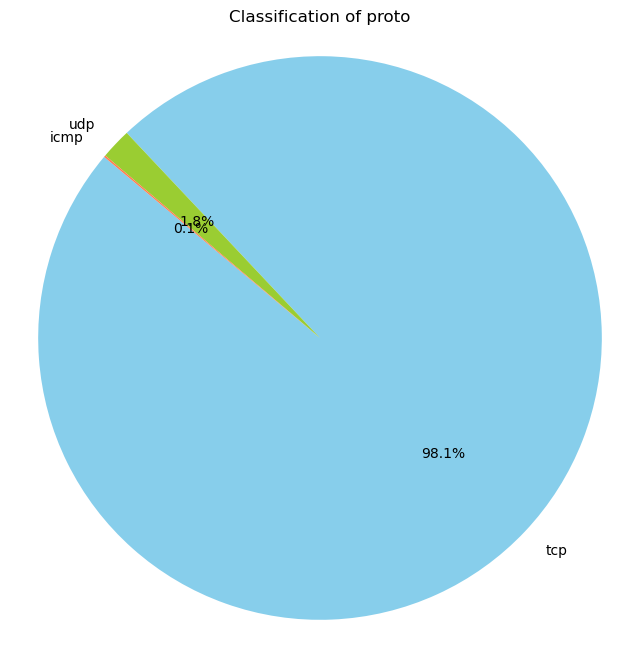

In [23]:
#creating pie chart of classification of 'proto'
classification= data['proto'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification, labels=classification.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellowgreen', 'coral', 'gold'])
plt.title('Classification of proto')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# categories = ['tcp', 'udp', 'icmp']
# counts = [2453142, 440105,25116]

# plt.figure(figsize=(8, 8))
# plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
# plt.axis('equal')
# plt.title('Distribution of Categories')
# plt.show()


In [24]:
column_name = 'label'

# Get the value counts
value_counts = data[column_name].value_counts()

# Calculate percentages
percentages = (value_counts / len(data[column_name])) * 100

# Combine values and percentages into a DataFrame
result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts.values, 'Percentage': percentages.values})

# Print the result
print(result_df)


                                   Value    Count  Percentage
0                                 Benign  8777766   35.110554
1                              Malicious  7046785   28.186731
2                       Malicious   DDoS  5778153   23.112276
3  Malicious   PartOfAHorizontalPortScan  3386241   13.544767
4                        Malicious   C&C     8660    0.034639
5                     Malicious   Attack     2755    0.011020
6               Malicious   FileDownload        3    0.000012


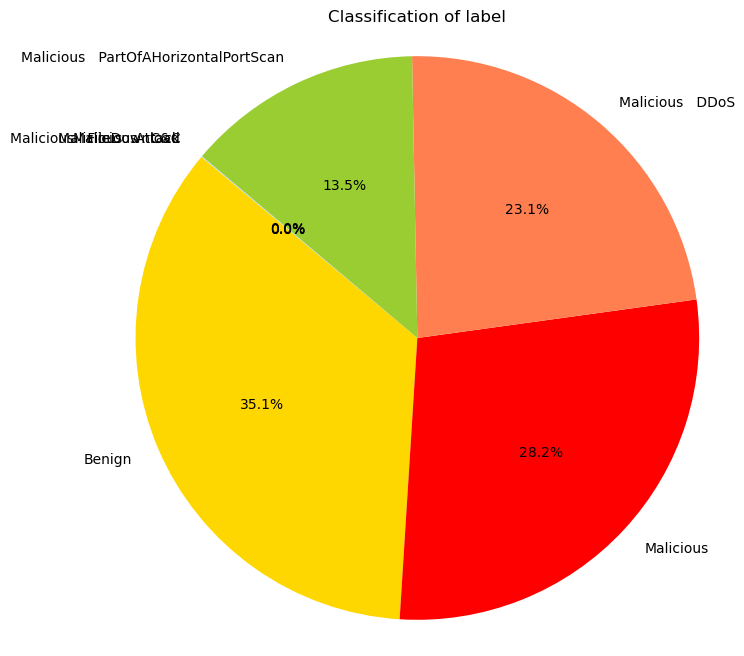

In [25]:
classification= data['label'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification, labels=classification.index, autopct='%1.1f%%', startangle=140, colors=['gold','red', 'coral','yellowgreen' ,'skyblue','white'])
plt.title('Classification of label')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [26]:
cols_to_label = ['id.orig_h','id.resp_h','proto','conn_state','history','label','detailed-label']
label_encoder = LabelEncoder()
for col in cols_to_label:
    data[col] = label_encoder.fit_transform(data[col])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   id.orig_h       int32  
 2   id.orig_p       float64
 3   id.resp_h       int32  
 4   id.resp_p       float64
 5   proto           int32  
 6   conn_state      int32  
 7   history         int32  
 8   orig_pkts       float64
 9   orig_ip_bytes   float64
 10  resp_pkts       float64
 11  resp_ip_bytes   float64
 12  label           int32  
 13  detailed-label  int32  
dtypes: float64(7), int32(7)
memory usage: 2.0 GB


<function matplotlib.pyplot.show(close=None, block=None)>

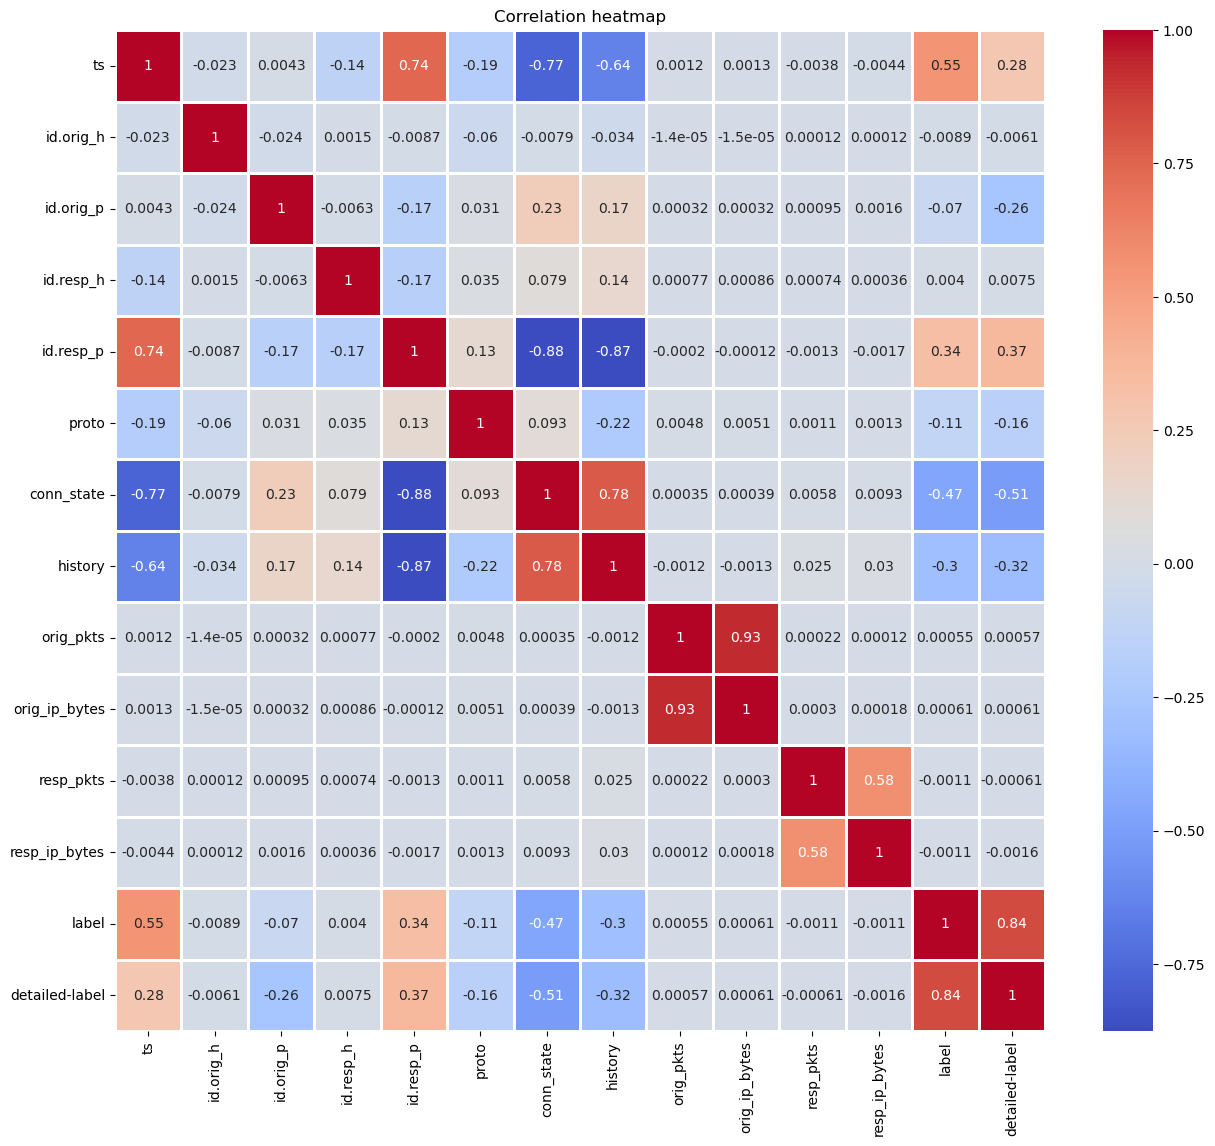

In [28]:
correlation_columns = [
    'ts' ,'id.orig_h','id.orig_p' ,'id.resp_h','id.resp_p','proto','conn_state','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','label','detailed-label']    

correlation_matrix1 = data[correlation_columns].corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation heatmap')
plt.show

In [29]:
col= ['id.orig_h','id.resp_h','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','detailed-label']
data.drop(columns=col, inplace = True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000363 entries, 0 to 25000362
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ts          float64
 1   id.orig_p   float64
 2   id.resp_p   float64
 3   proto       int32  
 4   conn_state  int32  
 5   history     int32  
 6   label       int32  
dtypes: float64(3), int32(4)
memory usage: 953.7 MB


In [31]:
data.shape

(25000363, 7)

In [32]:

X = data[['ts', 'id.orig_p', 'id.resp_p', 'conn_state', 'history', 'label']]
y = data['proto']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [34]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [35]:
y_pred = clf.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


[Text(0.40625, 0.9375, 'x[0] <= 1526757184.0\ngini = 0.037\nsamples = 20000290\nvalue = [19996, 19628218, 352076]'),
 Text(0.2, 0.8125, 'x[4] <= 15.5\ngini = 0.502\nsamples = 806680\nvalue = [13870, 466214, 326596]'),
 Text(0.15, 0.6875, 'x[1] <= 38.0\ngini = 0.078\nsamples = 340486\nvalue = [13870, 20, 326596]'),
 Text(0.1, 0.5625, 'x[2] <= 16857.0\ngini = 0.003\nsamples = 13890\nvalue = [13870, 20, 0]'),
 Text(0.05, 0.4375, 'gini = 0.0\nsamples = 13870\nvalue = [13870, 0, 0]'),
 Text(0.15, 0.4375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20, 0]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 326596\nvalue = [0, 0, 326596]'),
 Text(0.25, 0.6875, 'gini = 0.0\nsamples = 466194\nvalue = [0, 466194, 0]'),
 Text(0.6125, 0.8125, 'x[4] <= 0.5\ngini = 0.003\nsamples = 19193610\nvalue = [6126, 19162004, 25480]'),
 Text(0.5625, 0.6875, 'gini = 0.0\nsamples = 6126\nvalue = [6126, 0, 0]'),
 Text(0.6625, 0.6875, 'x[3] <= 9.5\ngini = 0.003\nsamples = 19187484\nvalue = [0, 19162004, 25480]'),
 Text(0.425

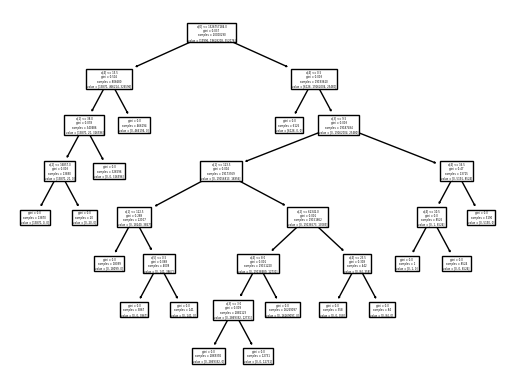

In [37]:

plot_tree(clf)


In [54]:
accuracy

0.9999996000058399